In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import grav_lens.preprocess as gp
from grav_lens.utils.statistics import get_stats
from grav_lens.preprocess.filtering import process_batch_filters

from grav_lens.models.load_models import load_minmaxscaler, load_ipca_low
from grav_lens.preprocess.gmm import reconstruct_image_from_gmm, reconstruct_batch_images

# Cargar el MinMaxScaler
minmaxscaler = load_minmaxscaler()
print(minmaxscaler)
# Cargar el modelo IPCA low
ipca_low = load_ipca_low()
print(ipca_low)


from grav_lens import get_datasets
max_files = 2000
batch_size = 64
home_data = os.path.join("..","data")

train_dataset, val_dataset, test_dataset = get_datasets(
    data_index=99,
    max_files=max_files,
    home=home_data,
    batch_size=batch_size,
    val_split=0.2,
    test_split=0.1,
)





IncrementalPCA(batch_size=64, n_components=64)
Using data folder: ..\data\1


In [2]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('model_0925.keras', safe_mode=False)

In [5]:
for X_batch, y_batch in train_dataset.take(1):
    print(X_batch.shape)
    print(y_batch.shape)
    predictions = loaded_model.predict(X_batch)

(64, 128, 128, 3)
(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step


In [10]:
img_predictions = reconstruct_batch_images(*predictions, 64)

c:\users\fbien.desktop-6fmear7\desktop\grav_lensing\src\grav_lens\preprocess\gmm.py:114: RuntimeWarning: divide by zero encountered in divide
  return weight * np.exp(-((x - mux) ** 2 / (2 * sigma_x ** 2) + (y - muy) ** 2 / (2 * sigma_y ** 2)))


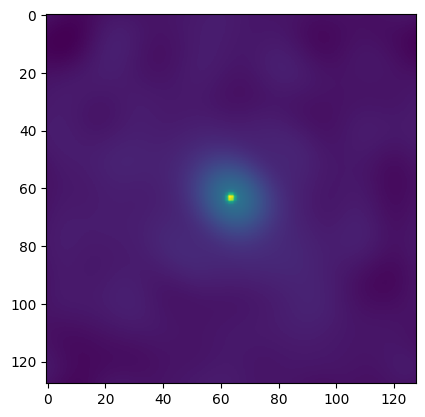

In [14]:
plt.imshow(img_predictions[2,:,:,0])